# Data processing

In [1]:
import pandas as pd
import numpy as np

In [2]:
pwd

'/Users/marijansoric/Documents/GitHub/CatMatch'

In [3]:
dfm = pd.read_csv('.data/movies.csv')
dfr = pd.read_csv('.data/ratings.csv')

In [4]:
dfm.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
dfr

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [6]:
dfr[dfr['movieId']==2].rating.mean()

3.4318181818181817

In [7]:
dfr[dfr['movieId']==1].userId.count()

215

In [8]:
f = lambda x:x**2

In [9]:
def f_(x):
    return x*2

In [10]:
f

<function __main__.<lambda>(x)>

In [11]:
dfm['reviews'] = dfr.apply(lambda x: dfr[dfr['movieId']==x[0]].userId.count() , axis=1)

In [12]:
dfm[dfm['reviews']<20]

,movieId,title,genres,reviews
300,342,Muriel's Wedding (1994),Comedy,7
301,343,"Baby-Sitters Club, The (1995)",Children,7
302,344,Ace Ventura: Pet Detective (1994),Comedy,7
303,345,"Adventures of Priscilla, Queen of the Desert, ...",Comedy|Drama,7
304,346,Backbeat (1993),Drama|Musical,7
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,5
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,5
9739,193585,Flint (2017),Drama,5
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,5


<Axes: >

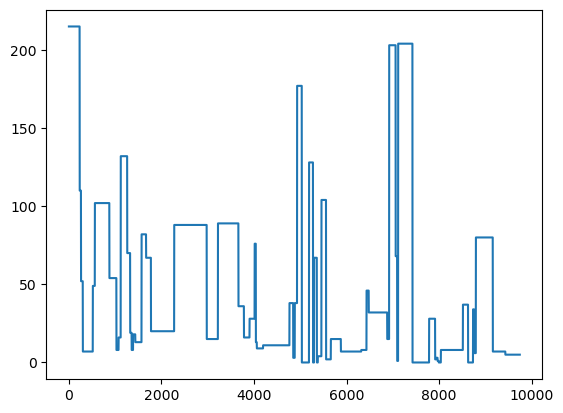

In [13]:
dfm.reviews.plot()

In [14]:
dfm

,movieId,title,genres,reviews
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,215
2,3,Grumpier Old Men (1995),Comedy|Romance,215
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,215
4,5,Father of the Bride Part II (1995),Comedy,215
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,5
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,5
9739,193585,Flint (2017),Drama,5
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,5


In [15]:
dfm['rating'] = dfm.apply(lambda x: dfr[dfr['movieId']==x[0]].rating.mean(), axis=1)

<Axes: >

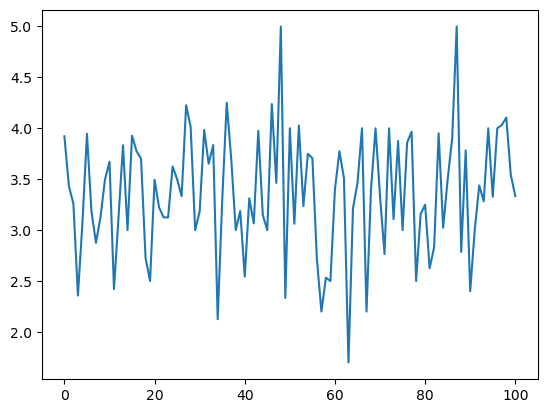

In [16]:
dfm.loc[:100].rating.plot()

In [17]:
#How many users are in the datasets?

len(np.unique(dfr.userId))

610

In [18]:
#How many movies are in the dataset?

len(np.unique(dfm.movieId))

9742

In [19]:
#How many of these movies are rated by users?

len(np.unique(dfr.movieId))

9724

In [20]:
len(dfm[dfm.rating.isna() ==False])

9724

In [21]:
#How many users have rated each movie?

c = 0
for id_user in np.unique(dfr.userId):
    if len(dfr[dfr['userId']==1]) == 9742: c+=1
print(c)

0


In [22]:
#Are there any rows that contain null values for some of the columns? Should these be dropped?

print(dfr.isnull().sum(),'\n\n',dfm.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64 

 movieId     0
title       0
genres      0
reviews     0
rating     18
dtype: int64


In [23]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   title    9742 non-null   object 
 2   genres   9742 non-null   object 
 3   reviews  9742 non-null   int64  
 4   rating   9724 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 380.7+ KB


# Create the user-item ratings matrix

$R=(r_{u,j}) \in \mathbb R^{m \times n}$. For $m$ users and $n$ items.

In [24]:
dfm.head()

,movieId,title,genres,reviews,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,215,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,215,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,215,2.357143
4,5,Father of the Bride Part II (1995),Comedy,215,3.071429


In [25]:
dfr.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [26]:
m = len(np.unique(dfr.userId))
n = len(np.unique(dfm.movieId))

In [27]:
dfr[dfr['userId']==1].where(dfr['movieId']==1)['rating'].dropna()

0    4.0
Name: rating, dtype: float64

In [28]:
np.unique(dfm.movieId)

array([     1,      2,      3, ..., 193585, 193587, 193609])

In [29]:
m, n

(610, 9742)

# Content based filtering

## Create a vector representation 
Of each movie using the "genres" column. I suggest creating a vector with length 32 (or longer if needed), where each dimension in the vector represents a genre. Then a vector representing each movie is 1 at each dimension if the movie is of that genre, and 0 if the movie is not of that genre. For example for three genres [Adventure, Action, Romance], the value for Spider Man would be [0, 1, 1] and the value for Indiana jones would be [1, 1, 0].

In [30]:
genres = []
for i in range(len(dfm)):
    genres = genres + dfm.genres[i].split('|')
    
genres = np.unique(genres).tolist()

In [31]:
genres

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [32]:
embedding = pd.DataFrame(index=dfm.movieId, columns=genres)
embedding

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
from tqdm import tqdm

for movieId in tqdm(embedding.index):
    for genre in genres:
        embedding.loc[movieId, genre] = int(genre in dfm[dfm['movieId'] == movieId].genres.iloc[0].split('|'))        

100%|█████████████████████| 9742/9742 [02:10<00:00, 74.71it/s]


In [36]:
embedding.set_index(dfm.index, inplace=True)

In [39]:
dfm

,movieId,title,genres,reviews,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,215,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,215,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,215,2.357143
4,5,Father of the Bride Part II (1995),Comedy,215,3.071429
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,5,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,5,3.500000
9739,193585,Flint (2017),Drama,5,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,5,3.500000


In [37]:
embedding

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
embedding.to_csv('embedding.csv')#, index=embedding.index, columns=embedding.columns)

NameError: name 'embedding' is not defined

Create the matrix $R$.

In [152]:
R = pd.DataFrame(index=np.unique(dfr.userId), columns=dfm.movieId)
R

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from tqdm import tqdm

for user in tqdm(R.columns[:10]):
    for movieId in dfr[dfr.userId == user].movieId:
        R.loc[movieId, user] = dfr[(dfr.userId == user) & (dfr.movieId == movieId)].rating.iloc[0]

  0%|                                  | 0/10 [00:00<?, ?it/s]

In [151]:
R

title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Gintama: The Movie (2010),anohana: The Flower We Saw That Day - The Movie (2013),Silver Spoon (2014),Love Live! The School Idol Movie (2015),Jon Stewart Has Left the Building (2015),Black Butler: Book of the Atlantic (2017),No Game No Life: Zero (2017),Flint (2017),Bungo Stray Dogs: Dead Apple (2018),Andrew Dice Clay: Dice Rules (1991)
1,4.0,4.030714,4.030714,4.030714,4.0,4.030714,4.5,4.030714,4.030714,4.030714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
dfm.set_index(dfm.title, inplace=True)

In [14]:
dfm

,movieId,title,genres
title,,,
Toy Story (1995),1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
Jumanji (1995),2,Jumanji (1995),Adventure|Children|Fantasy
Grumpier Old Men (1995),3,Grumpier Old Men (1995),Comedy|Romance
Waiting to Exhale (1995),4,Waiting to Exhale (1995),Comedy|Drama|Romance
Father of the Bride Part II (1995),5,Father of the Bride Part II (1995),Comedy
...,...,...,...
Black Butler: Book of the Atlantic (2017),193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
No Game No Life: Zero (2017),193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
Flint (2017),193585,Flint (2017),Drama


Create a class called ContentBasedRecommender which has a constructor that takes in the movie embeddings (a matrix where each row represents the vector representation for each movie), and this computes the pairwise cosine similarity between each movie using their embedding. Use the sklearn.metrics.pairwise to compute the pairwise similarity score.

In [15]:
R = R.T.set_index(dfm.index).T

In [29]:
R

title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Gintama: The Movie (2010),anohana: The Flower We Saw That Day - The Movie (2013),Silver Spoon (2014),Love Live! The School Idol Movie (2015),Jon Stewart Has Left the Building (2015),Black Butler: Book of the Atlantic (2017),No Game No Life: Zero (2017),Flint (2017),Bungo Stray Dogs: Dead Apple (2018),Andrew Dice Clay: Dice Rules (1991)
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
import seaborn as sns

In [137]:
R.to_csv('R.csv')

In [138]:
R

title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Gintama: The Movie (2010),anohana: The Flower We Saw That Day - The Movie (2013),Silver Spoon (2014),Love Live! The School Idol Movie (2015),Jon Stewart Has Left the Building (2015),Black Butler: Book of the Atlantic (2017),No Game No Life: Zero (2017),Flint (2017),Bungo Stray Dogs: Dead Apple (2018),Andrew Dice Clay: Dice Rules (1991)
1,4.0,4.030714,4.030714,4.030714,4.0,4.030714,4.5,4.030714,4.030714,4.030714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
dfm.index

Index(['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)',
       'Waiting to Exhale (1995)', 'Father of the Bride Part II (1995)',
       'Heat (1995)', 'Sabrina (1995)', 'Tom and Huck (1995)',
       'Sudden Death (1995)', 'GoldenEye (1995)',
       ...
       'Gintama: The Movie (2010)',
       'anohana: The Flower We Saw That Day - The Movie (2013)',
       'Silver Spoon (2014)', 'Love Live! The School Idol Movie (2015)',
       'Jon Stewart Has Left the Building (2015)',
       'Black Butler: Book of the Atlantic (2017)',
       'No Game No Life: Zero (2017)', 'Flint (2017)',
       'Bungo Stray Dogs: Dead Apple (2018)',
       'Andrew Dice Clay: Dice Rules (1991)'],
      dtype='object', name='title', length=9742)

# Class

In [18]:
embedding = pd.read_csv('embedding.csv')

In [19]:
embedding

,Unnamed: 0,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,4,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,9737,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9738,9738,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9739,9739,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9740,9740,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
R

title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Gintama: The Movie (2010),anohana: The Flower We Saw That Day - The Movie (2013),Silver Spoon (2014),Love Live! The School Idol Movie (2015),Jon Stewart Has Left the Building (2015),Black Butler: Book of the Atlantic (2017),No Game No Life: Zero (2017),Flint (2017),Bungo Stray Dogs: Dead Apple (2018),Andrew Dice Clay: Dice Rules (1991)
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
embedding.set_index(dfm.index, inplace=True)

In [22]:
import seaborn as sns

<Axes: >

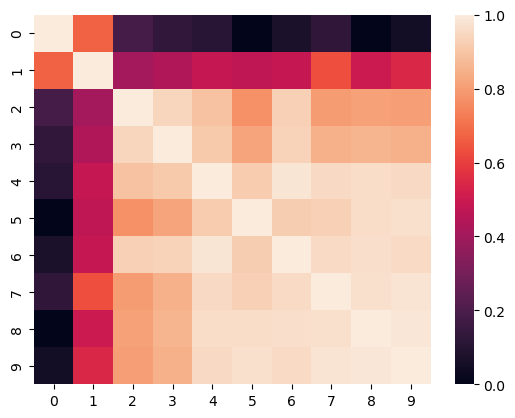

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

sns.heatmap(cosine_similarity(embedding[:10][:10]))

In [24]:
dfm.iloc[2].genres

'Comedy|Romance'

In [25]:
dfm.iloc[6].genres

'Comedy|Romance'

In [146]:
from sklearn.metrics.pairwise import cosine_similarity

class ContentBasedRecommender():
    
    def __init__(self, embedding):
        self.embedding = embedding
        self.similarity_matrix = None
        
    def matrix_pairwise_cosine_similarity(self):
        self.similarity_matrix = pd.DataFrame(cosine_similarity(self.embedding), index=self.embedding.index)
        self.similarity_matrix = self.similarity_matrix.T.set_index(self.embedding.index).T
        #return self.similarity_matrix
    
    # find the k most similar items to the item X
    def k_most_similar_item_user(self, movie, userId, k):
        movies_rated = R.loc[userId].dropna()
        ind = movies_rated.index.tolist()

        if movie in ind:
            return movies_rated.loc[movie]
        else:
            ind.append(movie)
        
        # matrix = self.matrix_pairwise_cosine_similarity()
        matrix = self.similarity_matrix
        new_matrix = matrix.loc[ind].T.loc[ind]
        k_best = new_matrix.loc[movie].sort_values(by=movie, ascending=False)
        
        mat = pd.concat([k_best, movies_rated], axis=1)#[:k]
        mat.rename(columns={1 : 'Scores'}, inplace=True)
        predicted_rate = (mat.values[:,0] @ mat.values[:,1])/(mat.values[:,0]).sum()
        return predicted_rate
        
    def predict(self):
        for userId in tqdm(R.index):
            for movie in R.columns:
                prediction = self.k_most_similar_item_user(movie, userId, 1)
                R.loc[userId, movie] = prediction
                print(prediction)
        return R
                
        self.similarity_matrix

In [147]:
E = ContentBasedRecommender(embedding)

In [148]:
E.matrix_pairwise_cosine_similarity()

In [149]:
E.predict()

  0%|                                | 0/1293 [00:00<?, ?it/s]

4.0
4.030714155553084
4.030714155553084
4.030714155553084
4.0
4.030714155553084
4.5
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.030714155553084
4.03071415555308

  0%|                                | 0/1293 [00:02<?, ?it/s]


ValueError: The column label 'Emma (1996)' is not unique.

In [104]:
E.k_most_similar_item_user(movie='Toy Story (1995)', userId=2)#, k=3)

4.030714155553084

In [133]:
R.loc[: ,'Emma (1996)']

title,Emma (1996),Emma (1996)
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
...,...,...
119145,NaN,NaN
129428,NaN,NaN
136020,NaN,NaN
137595,NaN,NaN


In [136]:
matrix

title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Gintama: The Movie (2010),anohana: The Flower We Saw That Day - The Movie (2013),Silver Spoon (2014),Love Live! The School Idol Movie (2015),Jon Stewart Has Left the Building (2015),Black Butler: Book of the Atlantic (2017),No Game No Life: Zero (2017),Flint (2017),Bungo Stray Dogs: Dead Apple (2018),Andrew Dice Clay: Dice Rules (1991)
title,,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),1.000000,0.670820,0.182574,0.129099,0.108465,0.000000,0.072548,0.125245,0.000000,0.048795,...,0.000092,0.000046,0.000046,0.000046,0.000000,0.000138,0.000138,0.000000,0.000046,0.000046
Jumanji (1995),0.670820,1.000000,0.408248,0.433013,0.485071,0.472456,0.486664,0.630126,0.496139,0.545545,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500051,0.500051,0.500000,0.500000,0.500000
Grumpier Old Men (1995),0.182574,0.408248,1.000000,0.942809,0.891133,0.771517,0.927173,0.800327,0.810191,0.801784,...,0.816539,0.816497,0.816539,0.816497,0.816497,0.816538,0.816538,0.816497,0.816497,0.816538
Waiting to Exhale (1995),0.129099,0.433013,0.942809,1.000000,0.910182,0.818317,0.936586,0.848875,0.859338,0.850420,...,0.866055,0.866055,0.866085,0.866025,0.866025,0.866055,0.866055,0.866055,0.866025,0.866055
Father of the Bride Part II (1995),0.108465,0.485071,0.891133,0.910182,1.000000,0.916698,0.983612,0.950930,0.962651,0.952661,...,0.970167,0.970142,0.970167,0.970142,0.970142,0.970167,0.970167,0.970142,0.970142,0.970167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Black Butler: Book of the Atlantic (2017),0.000138,0.500051,0.816538,0.866055,0.970167,0.944931,0.973345,0.980196,0.992291,0.981992,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
No Game No Life: Zero (2017),0.000138,0.500051,0.816538,0.866055,0.970167,0.944911,0.973345,0.980196,0.992278,0.981980,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Flint (2017),0.000000,0.500000,0.816497,0.866055,0.970142,0.944911,0.973329,0.980196,0.992278,0.981981,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [134]:
R

title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Gintama: The Movie (2010),anohana: The Flower We Saw That Day - The Movie (2013),Silver Spoon (2014),Love Live! The School Idol Movie (2015),Jon Stewart Has Left the Building (2015),Black Butler: Book of the Atlantic (2017),No Game No Life: Zero (2017),Flint (2017),Bungo Stray Dogs: Dead Apple (2018),Andrew Dice Clay: Dice Rules (1991)
1,4.0,4.030714,4.030714,4.030714,4.0,4.030714,4.5,4.030714,4.030714,4.030714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
m

,Toy Story (1995),Scores
title,,
Toy Story (1995),1.000000,4.0
Father of the Bride Part II (1995),0.108465,4.0
Sabrina (1995),0.072548,4.5


In [99]:
movies_rated.loc['Toy Story (1995)']

4.0

1.181012853920329

In [59]:
new_matrix = matrix.loc[ind].T.loc[ind]
k_best = new_matrix.loc['Toy Story (1995)'].sort_values(ascending=False)

In [56]:
movies_rated

title
Toy Story (1995)                      4.0
Father of the Bride Part II (1995)    4.0
Sabrina (1995)                        4.5
Name: 1, dtype: object

In [65]:
a = pd.concat([k_best, movies_rated], axis=1)

In [66]:
a.rename(columns={1:'t'})

,Toy Story (1995),t
title,,
Toy Story (1995),1.000000,4.0
Father of the Bride Part II (1995),0.108465,4.0
Sabrina (1995),0.072548,4.5


In [39]:
matrix = E.matrix_pairwise_cosine_similarity()

In [43]:
movies_rated = R.loc[1].dropna()
print(movies_rated)
        
ind = movies_rated.index.tolist()
if 'Toy Story (1995)' not in ind:
    ind.append(movie)

title
Toy Story (1995)                      4.0
Father of the Bride Part II (1995)    4.0
Sabrina (1995)                        4.5
Name: 1, dtype: object


In [44]:
ind

['Toy Story (1995)', 'Father of the Bride Part II (1995)', 'Sabrina (1995)']

title
Toy Story (1995)                      4.0
Father of the Bride Part II (1995)    4.0
Sabrina (1995)                        4.5
Name: 1, dtype: object
title                                      Toy Story (1995)  Jumanji (1995)  \
title                                                                         
Toy Story (1995)                                   1.000000        0.670820   
Jumanji (1995)                                     0.670820        1.000000   
Grumpier Old Men (1995)                            0.182574        0.408248   
Waiting to Exhale (1995)                           0.129099        0.433013   
Father of the Bride Part II (1995)                 0.108465        0.485071   
...                                                     ...             ...   
Black Butler: Book of the Atlantic (2017)          0.000138        0.500051   
No Game No Life: Zero (2017)                       0.000138        0.500051   
Flint (2017)                                       0.00

(title
 Toy Story (1995)                      4.0
 Father of the Bride Part II (1995)    4.0
 Sabrina (1995)                        4.5
 Name: 1, dtype: object,
 title
 Toy Story (1995)                      1.000000
 Father of the Bride Part II (1995)    0.108465
 Sabrina (1995)                        0.072548
 Name: Toy Story (1995), dtype: float64)

In [101]:
similarity_matrix

title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Gintama: The Movie (2010),anohana: The Flower We Saw That Day - The Movie (2013),Silver Spoon (2014),Love Live! The School Idol Movie (2015),Jon Stewart Has Left the Building (2015),Black Butler: Book of the Atlantic (2017),No Game No Life: Zero (2017),Flint (2017),Bungo Stray Dogs: Dead Apple (2018),Andrew Dice Clay: Dice Rules (1991)
title,,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),1.000000,0.774597,0.316228,0.258199,0.447214,0.000000,0.316228,0.632456,0.000000,0.258199,...,0.447214,0.316228,0.316228,0.447214,0.0,0.670820,0.774597,0.00000,0.316228,0.447214
Jumanji (1995),0.774597,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.816497,0.000000,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.0,0.288675,0.333333,0.00000,0.000000,0.000000
Grumpier Old Men (1995),0.316228,0.000000,1.000000,0.816497,0.707107,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.353553,0.000000,0.500000,0.000000,0.0,0.353553,0.408248,0.00000,0.000000,0.707107
Waiting to Exhale (1995),0.258199,0.000000,0.816497,1.000000,0.577350,0.000000,0.816497,0.000000,0.000000,0.000000,...,0.288675,0.408248,0.816497,0.000000,0.0,0.288675,0.333333,0.57735,0.000000,0.577350
Father of the Bride Part II (1995),0.447214,0.000000,0.707107,0.577350,1.000000,0.000000,0.707107,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.707107,0.000000,0.0,0.500000,0.577350,0.00000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Black Butler: Book of the Atlantic (2017),0.670820,0.288675,0.353553,0.288675,0.500000,0.288675,0.353553,0.000000,0.500000,0.288675,...,0.750000,0.353553,0.353553,0.500000,0.0,1.000000,0.866025,0.00000,0.707107,0.500000
No Game No Life: Zero (2017),0.774597,0.333333,0.408248,0.333333,0.577350,0.000000,0.408248,0.000000,0.000000,0.000000,...,0.577350,0.408248,0.408248,0.577350,0.0,0.866025,1.000000,0.00000,0.408248,0.577350
Flint (2017),0.000000,0.000000,0.000000,0.577350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.707107,0.707107,0.000000,0.0,0.000000,0.000000,1.00000,0.000000,0.000000


In [100]:
similarity_matrix = pd.DataFrame(cosine_similarity(embedding), index=embedding.index)
similarity_matrix = similarity_matrix.T.set_index(embedding.index).T

KeyError: '[1, 5, 7] not in index'

In [26]:
matrix = E.matrix_pairwise_cosine_similarity()

In [123]:
E.k_most_similar_item(X='Toy Story (1995)', k=15)

['Toy Story (1995)',
 'Adventures of Rocky and Bullwinkle, The (2000)',
 "Emperor's New Groove, The (2000)",
 'Monsters, Inc. (2001)',
 'Tale of Despereaux, The (2008)',
 'Wild, The (2006)',
 'Moana (2016)',
 'Turbo (2013)',
 'Antz (1998)',
 'Toy Story 2 (1999)',
 'The Good Dinosaur (2015)',
 'Asterix and the Vikings (Astérix et les Vikings) (2006)',
 'Shrek the Third (2007)',
 'Toy Story 3 (2010)',
 'Space Jam (1996)']

In [102]:
E.embedding

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
title,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Black Butler: Book of the Atlantic (2017),0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
No Game No Life: Zero (2017),0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Flint (2017),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [117]:
matrix = E.matrix_pairwise_cosine_similarity()

In [94]:
matrix

title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Gintama: The Movie (2010),anohana: The Flower We Saw That Day - The Movie (2013),Silver Spoon (2014),Love Live! The School Idol Movie (2015),Jon Stewart Has Left the Building (2015),Black Butler: Book of the Atlantic (2017),No Game No Life: Zero (2017),Flint (2017),Bungo Stray Dogs: Dead Apple (2018),Andrew Dice Clay: Dice Rules (1991)
title,,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),1.000000,0.774597,0.316228,0.258199,0.447214,0.000000,0.316228,0.632456,0.000000,0.258199,...,0.447214,0.316228,0.316228,0.447214,0.0,0.670820,0.774597,0.00000,0.316228,0.447214
Jumanji (1995),0.774597,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.816497,0.000000,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.0,0.288675,0.333333,0.00000,0.000000,0.000000
Grumpier Old Men (1995),0.316228,0.000000,1.000000,0.816497,0.707107,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.353553,0.000000,0.500000,0.000000,0.0,0.353553,0.408248,0.00000,0.000000,0.707107
Waiting to Exhale (1995),0.258199,0.000000,0.816497,1.000000,0.577350,0.000000,0.816497,0.000000,0.000000,0.000000,...,0.288675,0.408248,0.816497,0.000000,0.0,0.288675,0.333333,0.57735,0.000000,0.577350
Father of the Bride Part II (1995),0.447214,0.000000,0.707107,0.577350,1.000000,0.000000,0.707107,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.707107,0.000000,0.0,0.500000,0.577350,0.00000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Black Butler: Book of the Atlantic (2017),0.670820,0.288675,0.353553,0.288675,0.500000,0.288675,0.353553,0.000000,0.500000,0.288675,...,0.750000,0.353553,0.353553,0.500000,0.0,1.000000,0.866025,0.00000,0.707107,0.500000
No Game No Life: Zero (2017),0.774597,0.333333,0.408248,0.333333,0.577350,0.000000,0.408248,0.000000,0.000000,0.000000,...,0.577350,0.408248,0.408248,0.577350,0.0,0.866025,1.000000,0.00000,0.408248,0.577350
Flint (2017),0.000000,0.000000,0.000000,0.577350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.707107,0.707107,0.000000,0.0,0.000000,0.000000,1.00000,0.000000,0.000000


In [196]:
R.loc[1].dropna()

title
Toy Story (1995)                      4.0
Father of the Bride Part II (1995)    4.0
Sabrina (1995)                        4.5
Name: 1, dtype: object

In [95]:
matrix.loc['Toy Story (1995)']

title
Toy Story (1995)                             1.000000
Jumanji (1995)                               0.774597
Grumpier Old Men (1995)                      0.316228
Waiting to Exhale (1995)                     0.258199
Father of the Bride Part II (1995)           0.447214
                                               ...   
Black Butler: Book of the Atlantic (2017)    0.670820
No Game No Life: Zero (2017)                 0.774597
Flint (2017)                                 0.000000
Bungo Stray Dogs: Dead Apple (2018)          0.316228
Andrew Dice Clay: Dice Rules (1991)          0.447214
Name: Toy Story (1995), Length: 9742, dtype: float64

In [113]:
(arr).sort_values(ascending=False)[:15].index.tolist()

['Toy Story (1995)',
 'Adventures of Rocky and Bullwinkle, The (2000)',
 "Emperor's New Groove, The (2000)",
 'Monsters, Inc. (2001)',
 'Tale of Despereaux, The (2008)',
 'Wild, The (2006)',
 'Moana (2016)',
 'Turbo (2013)',
 'Antz (1998)',
 'Toy Story 2 (1999)',
 'The Good Dinosaur (2015)',
 'Asterix and the Vikings (Astérix et les Vikings) (2006)',
 'Shrek the Third (2007)',
 'Toy Story 3 (2010)',
 'Space Jam (1996)']

Create a method that predicts the missing ratings in the matrix using the k-nearest nieghbors for each